## Function for Cross Validation

In [18]:
# Import StratifiedKFold
from sklearn.model_selection import StratifiedKFold
# Import confusion matrix, accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score

def cross_validate(model, X, y, cv=10):

    # Let's split data into 10 folds with stratisfied sampling
    kf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=0)

    # Let's create a dictionary to store the scores
    scores = {}
    
    # Let's iterate over the folds
    i = 1
    for train_index, test_index in kf.split(X, y):
        
        # Let's split the data into train and test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        y_train_vals = y_train.values
        # Convert in 1D array
        y_train_vals = y_train_vals.reshape(-1)

        # Let's fit the model
        model.fit(X_train.values, y_train_vals)
        
        # Let's predict the test data
        y_pred = model.predict(X_test.values)
        
        # Let's calculate the accuracy score
        acc = accuracy_score(y_test, y_pred)

        # Let's calculate the confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        
        # Let's append the score to the list
        scores[f'Fold-{i}'] = {'accuracy': acc, 'confusion_matrix': cm}
        i += 1

    # Let's return the scores
    return scores

## LWP Classifier Class

In [19]:
import numpy as np

# Implement Learning by Prototypes Classifier where class prototype is the mean of the training examples of that class
# To classify a test image, find the prototype with the shortest distance.
from collections import OrderedDict

class LearningWithPrototypes:

    # Constructor Function for our class
    def __init__(self, distance='euclidean'):
        self.class_prototype = OrderedDict()  # class prototypes
        self.class_count = OrderedDict()  # label frequency array
        self.class_name = []  # labels
        self.distance = distance  # distance metric

    # Training Function for our class
    def fit(self, X, y):

        # Loop over all the input feature vectors
        for i in range(len(y)):

            if y[i] not in self.class_name:
                # Encountering a new label for the first time
                self.class_name.append(y[i])
                self.class_prototype[y[i]] = np.zeros(len(X[0]))
                self.class_count[y[i]] = 0
            
            # Steps for the mean calculation for this class's prototype
            self.class_prototype[y[i]] += X[i]
            self.class_count[y[i]] += 1

        # Looping over the prototype dictionary to calculate mean
        for key in self.class_prototype:
            self.class_prototype[key] = self.class_prototype[key]/self.class_count[key]
    
    # Function to predict labels for multiple feature vectors based on Eucledian Distance
    def predict(self, X):
        
        # Predictions array
        pred = []

        # Looping over all feature vectors
        for i in range(len(X)):

            # Distance array
            dist = []
            
            # Calculating the distance of our feature vector from all the prototypes
            for key in self.class_prototype:
                if self.distance == 'euclidean':
                    dist.append(np.linalg.norm(X[i] - self.class_prototype[key]))
                elif self.distance == 'manhattan':
                    dist.append(np.linalg.norm(X[i] - self.class_prototype[key], ord=1))
                elif self.distance == 'cosine':
                    dist.append(1 - np.dot(X[i], self.class_prototype[key])/(np.linalg.norm(X[i])*np.linalg.norm(self.class_prototype[key])))
                else:
                    raise ValueError('Invalid distance function')

            # Taking the label of the prototype at the minimum distance
            pred.append(self.class_name[dist.index(min(dist))])
        
        # Returning the predictions array
        return np.array(pred)


## Creating a Sample Dataset

In [20]:
# Randomly Generate 2d data, 1000 samples, 2 classes, 2 features
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=0)

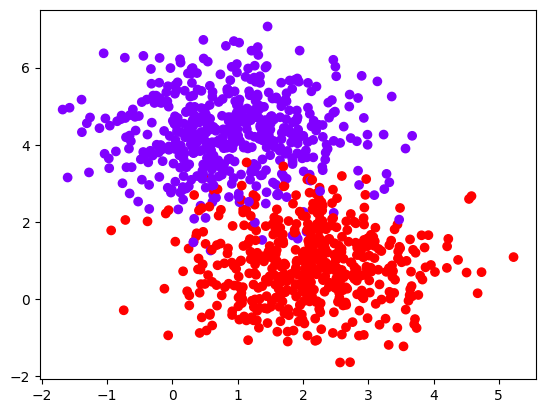

In [21]:
# Plot the data
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow')
plt.show()

Training LWP

In [22]:
import numpy as np
import pandas as pd

df_x = pd.DataFrame(X)
df_y = pd.DataFrame(y)

In [23]:
df_x.head()

,0,1
0,0.466618,3.865713
1,2.843828,3.326509
2,0.611215,2.512460
3,3.816534,1.651759
4,1.280972,0.628274


In [24]:
df_y.head()

,0
0,0
1,0
2,0
3,1
4,1


In [25]:
# Cross validate our model
scores = cross_validate(LearningWithPrototypes(), df_x, df_y, cv=10)

In [29]:
# Let's print the scores
for key in scores:
    print(key)
    print("Accuracy: ", scores[key]['accuracy'])
    print("Confusion Matrix: ", scores[key]['confusion_matrix'])

Fold-1
Accuracy:  1.0
Confusion Matrix:  [[50  0]
 [ 0 50]]
Fold-2
Accuracy:  0.87
Confusion Matrix:  [[49  1]
 [12 38]]
Fold-3
Accuracy:  0.83
Confusion Matrix:  [[50  0]
 [17 33]]
Fold-4
Accuracy:  0.8
Confusion Matrix:  [[50  0]
 [20 30]]
Fold-5
Accuracy:  0.83
Confusion Matrix:  [[50  0]
 [17 33]]
Fold-6
Accuracy:  0.84
Confusion Matrix:  [[50  0]
 [16 34]]
Fold-7
Accuracy:  0.77
Confusion Matrix:  [[50  0]
 [23 27]]
Fold-8
Accuracy:  0.75
Confusion Matrix:  [[50  0]
 [25 25]]
Fold-9
Accuracy:  0.82
Confusion Matrix:  [[50  0]
 [18 32]]
Fold-10
Accuracy:  0.75
Confusion Matrix:  [[50  0]
 [25 25]]


Training Data on Whole Dataset

In [30]:
# Train Dataset on Whole Data
model = LearningWithPrototypes()
model.fit(df_x.values, df_y.values.reshape(-1))

In [31]:
prototypes = model.class_prototype

In [34]:
proto_points = []
for c in prototypes:
    proto_points.append(prototypes[c])

In [35]:
proto_points

[array([0.90568611, 4.27535188]), array([2.07391937, 0.89566976])]

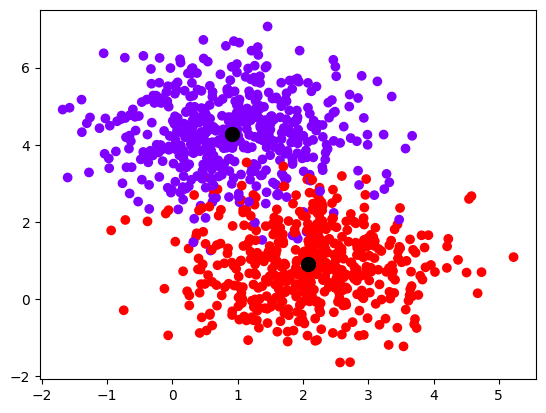

In [36]:
# Plot the data with Prototypes

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow')

for i in range(len(proto_points)):
    plt.scatter(proto_points[i][0], proto_points[i][1], c='black', s=100)

Prototypes Look Good!